# Market analysis with Jupyter AI

In [1]:
# -------------------------------------------------------------
# 📊 Market behavior of Palantir Technologies with local AI tools
# As of November 7, 2025 • 10:00 PM GMT+1
# -------------------------------------------------------------
# Requirements:
#   pip install yfinance pandas numpy requests matplotlib
#   (ensure your local Ollama model endpoint is running)
# -------------------------------------------------------------
# adapted from DeepLearningAI


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## Step 1. Defining dates and ticker values

In [2]:
# --------------------------------------------------------------
# 🎯 Define analysis parameters
# --------------------------------------------------------------
# This cell sets the scope of the financial analysis by specifying
# the stock ticker symbol and the time range of interest.
# These variables are used throughout the notebook to download,
# analyze, and visualize Palantir’s market data for the period
# January 1, 2023 → November 7, 2025.

ticker = "PLTR"
start_date = "2023-01-01"
end_date = "2025-11-07"

## Step 2. Download stock data

To download Palentir stock data, use a prompt like this:

    Use yfinance to download Palentir (PLTR) stock data for this period:

- start date: January 01, 2023
- end date: November 07, 2025
- Save the returned results in a DataFrame called PLTR

In [3]:
# --------------------------------------------------------------
# 📥 Fetch and inspect historical market data
# --------------------------------------------------------------
# This cell retrieves Palantir's historical stock data from Yahoo Finance
# using the yfinance API for the specified date range.
# The resulting DataFrame (`pltr`) contains daily Open, High, Low, Close, 
# and Volume data. We preview the first and last rows to ensure that
# the data download completed successfully and the date range is correct.

import yfinance as yf

# Download stock data for Palantir
pltr = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows to confirm
print("First few rows:")
print(pltr.head())

# Display the last few rows to confirm
print("\nLast few rows:")
print(pltr.tail())

C:\Users\ITSMARTSOLUTIONS\AppData\Local\Temp\ipykernel_6676\970100772.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pltr = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

First few rows:
Price      Close   High    Low  Open    Volume
Ticker      PLTR   PLTR   PLTR  PLTR      PLTR
Date                                          
2023-01-03  6.39  6.640  6.275  6.58  29969900
2023-01-04  6.58  6.675  6.370  6.48  31660500
2023-01-05  6.32  6.490  6.250  6.45  34186000
2023-01-06  6.40  6.450  6.090  6.40  30596400
2023-01-09  6.50  6.670  6.400  6.49  31028900

Last few rows:
Price            Close        High         Low        Open     Volume
Ticker            PLTR        PLTR        PLTR        PLTR       PLTR
Date                                                                 
2025-10-31  200.470001  204.179993  197.919998  199.199997   52697600
2025-11-03  207.179993  207.520004  201.820007  205.044998   81016800
2025-11-04  190.740005  195.699997  185.559998  192.070007  121380900
2025-11-05  187.899994  190.320007  181.210007  189.000000   76121000
2025-11-06  175.050003  191.089996  174.529999  187.990005   78468600


In the chat window, ask how you can flatten the columns of the DataFrame using a prompt like this:
> The DataFrame aapl has multiIndexed columns [('Close','PLTR'),('High','PLTR'),('Low','PLTR'),('Open','PLTR'),('Volume','PLTR')]. Flatten the columns by removing 'PLTR'.

In [4]:
# --------------------------------------------------------------
# 🧱 Flatten column structure for easier access
# --------------------------------------------------------------
# When data is downloaded for multiple tickers, yfinance often returns
# a DataFrame with a MultiIndex (e.g., ('Close', 'PLTR')). 
# This step simplifies the structure by keeping only the first-level 
# column names ('Close', 'Open', 'High', etc.), making the dataset 
# easier to manipulate and reference in subsequent analysis.
# After flattening, we print the column names and a few rows to confirm.

pltr.columns = pltr.columns.get_level_values(0)

# Verify the change
print(pltr.columns)
print(pltr.head())

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Price       Close   High    Low  Open    Volume
Date                                           
2023-01-03   6.39  6.640  6.275  6.58  29969900
2023-01-04   6.58  6.675  6.370  6.48  31660500
2023-01-05   6.32  6.490  6.250  6.45  34186000
2023-01-06   6.40  6.450  6.090  6.40  30596400
2023-01-09   6.50  6.670  6.400  6.49  31028900


## Step 3: Calculate Basic Statistics & Metrics

In the same chat window, use a prompt like this to calculate the basic descriptive statistics of the DataFrame:
> Display the shape and statistical summary of the DataFrame pltr.

In [5]:
# --------------------------------------------------------------
# 📊 Inspect dataset structure and key statistics
# --------------------------------------------------------------
# This cell provides a quick overview of the dataset after loading and cleaning.
# The shape reveals how many observations (rows) and variables (columns) 
# the DataFrame contains, helping to confirm that the data covers 
# the expected period and fields. 
# The descriptive summary offers insight into the central tendencies,
# dispersion, and ranges of numerical variables before deeper analysis.

# Display the shape (rows, columns)
print("Shape of the DataFrame/pltr:", pltr.shape)

# Display the statistical summary
print("\nStatistical Summary:")
print(pltr.describe())

Shape of the DataFrame/pltr: (715, 5)

Statistical Summary:
Price       Close        High         Low        Open        Volume
count  715.000000  715.000000  715.000000  715.000000  7.150000e+02
mean    55.412629   56.608283   53.943515   55.272316  6.724779e+07
std     55.158347   56.222350   53.826630   55.119388  4.355881e+07
min      6.320000    6.450000    6.090000    6.400000  1.486050e+07
25%     16.275000   16.692500   15.955000   16.214999  3.893460e+07
50%     24.700001   25.355000   24.049999   24.709999  5.645500e+07
75%     84.540001   86.719997   81.155003   83.225002  8.311205e+07
max    207.179993  207.520004  201.820007  205.044998  4.502905e+08


To calculate the total return, use a prompt like this:
> Use the Close column of DataFrame pltr to find the total return in percentage (total_return) based on the start price and end price.

In [6]:
# --------------------------------------------------------------
# 💰 Calculate total investment return over the analysis period
# --------------------------------------------------------------
# This cell computes Palantir’s total percentage return based on the 
# closing prices at the start and end of the selected period. 
# The calculation provides a single performance metric summarizing 
# overall price growth (or decline) from January 2023 to November 2025, 
# serving as a baseline for further volatility and trend analysis.

# Getting starting and ending prices
start_price = pltr['Close'].iloc[0]
end_price = pltr['Close'].iloc[-1]

#calculate total return
total_return = ((end_price - start_price) / start_price) * 100

print(f"Total return: {total_return:.2f}%")

Total return: 2639.44%


## Step 4: Visualize the Closing Price

Create a line chart showing the closing price trend using the column 'Close' of the DataFrame pltr.

> Use matplotlib to create a professional-looking chart with:
> - Clear title and axis labels
> - Grid for readability
> - Appropriate colors and styling

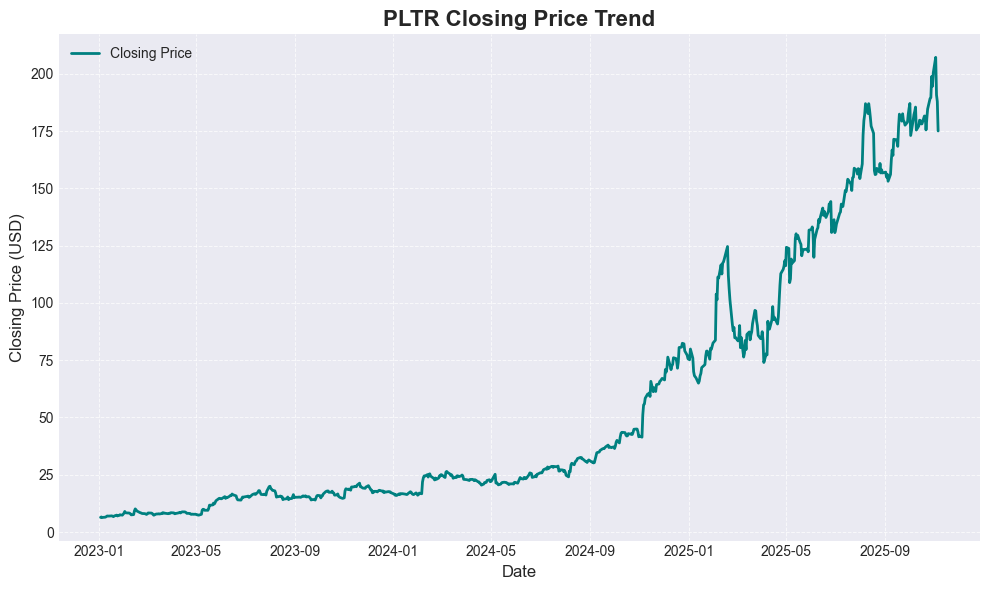

In [7]:
# --------------------------------------------------------------
# 📈 Visualize closing price trend over time
# --------------------------------------------------------------
# This cell generates a clean, time-series chart of Palantir’s closing prices
# across the selected period. The visualization highlights overall price 
# movement and trend direction, serving as an intuitive validation of 
# the computed performance metrics.

import matplotlib.pyplot as plt

# Create the figure and axis
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Plot the close price trend
plt.plot(pltr['Close'], color='teal', linewidth=2, label='Closing Price')

# Add title and labels
plt.title('PLTR Closing Price Trend', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)

# Add grid for readability
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Add legend
plt.legend()

# Add tight layout for aesthetics
plt.tight_layout()

# Show the chart
plt.show()

- To find the dates that correspond to the peak and lowest prices, use a prompt like this:
  > Use the Close column of aapl dataFrame to find and print:
  > - the peak date (in a variable called `peak_date`) that corresponds to the maximum closing price `peak_price`
  > - the lowest date (in a variable called `lowest_date`) that corresponds to the minimum closing price `lowest_price`
  >
  > Update the above code to show the peak and low prices in the line chart.

Peak price: 207.18 on 2025-11-03 00:00:00
Lowest price: 6.32 on 2023-01-05 00:00:00


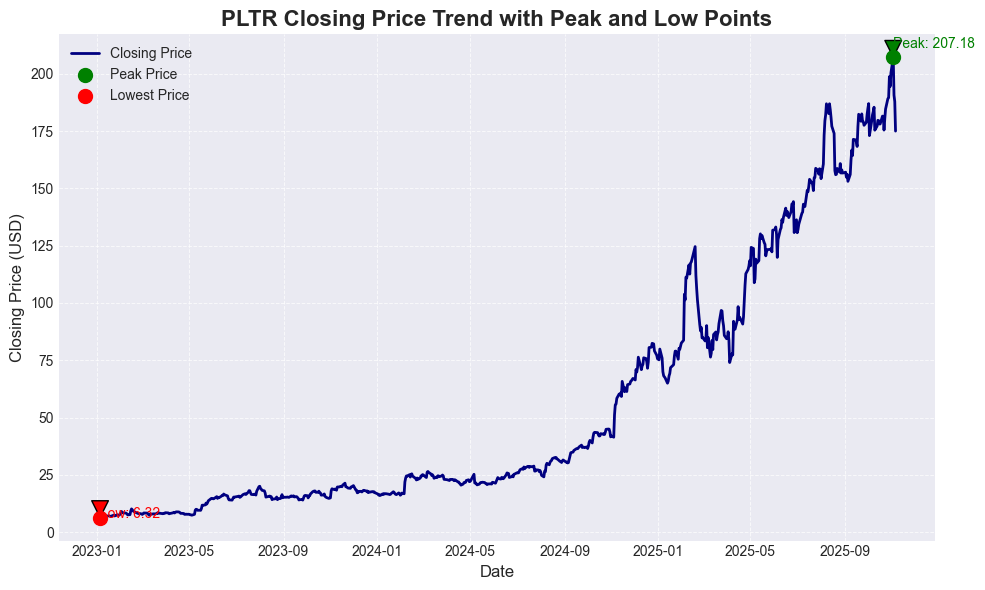

In [8]:
# --------------------------------------------------------------
# 📍 Identify and visualize price extremes within the analysis period
# --------------------------------------------------------------
# This cell detects Palantir’s highest and lowest closing prices 
# and their corresponding dates within the selected timeframe. 
# It then visualizes these key inflection points on the price trend 
# chart to reveal market extremes and potential turning points. 
# Annotating these values helps verify data integrity and supports 
# later contextual analysis (e.g., linking peaks/lows to major news events).


import matplotlib.pyplot as plt

# Find the peak (maximum) and lowest (minimum) closing prices
peak_price = pltr['Close'].max()
lowest_price = pltr['Close'].min()

# Find the corresponding dates
peak_date = pltr['Close'].idxmax()
lowest_date = pltr['Close'].idxmin()

# Print the results
print(f"Peak price: {peak_price:.2f} on {peak_date}")
print(f"Lowest price: {lowest_price:.2f} on {lowest_date}")

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the closing price trend
plt.plot(pltr['Close'], color='navy', linewidth=2, label='Closing Price')

# Highlight the peak and lowest points
plt.scatter(peak_date, peak_price, color='green', s=100, label='Peak Price', zorder=5)
plt.scatter(lowest_date, lowest_price, color='red', s=100, label='Lowest Price', zorder=5)

# Annotate the points
plt.annotate(f'Peak: {peak_price:.2f}', 
             xy=(peak_date, peak_price), 
             xytext=(peak_date, peak_price * 1.02),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10, color='green')

plt.annotate(f'Low: {lowest_price:.2f}', 
             xy=(lowest_date, lowest_price), 
             xytext=(lowest_date, lowest_price * 0.95),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

# Title, labels, grid, legend, and layout
plt.title('PLTR Closing Price Trend with Peak and Low Points', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

- To find the context related to the peak and lowest date, use a prompt like this:
  > For the `peak_date` and `lowest_date`, search for related Palentir news using Serper. The Serper API key is saved in a .env file. Store the snippets of the found articles in a json string `news_snippets` that has these fields: peak_date, lowest_date, peak_news_snippets, lowest_news_snippets.

In [9]:
# --------------------------------------------------------------
# 📰 Retrieve contextual financial news for identified price events
# --------------------------------------------------------------
# This cell connects to the Serper API to collect recent news headlines
# related to Palantir Technologies around its detected peak and low dates. 
# By enriching quantitative findings with relevant qualitative context,
# the analysis can link market movements to real-world events such as 
# earnings reports, contracts, or investor sentiment shifts. 
# The results are structured as a JSON string for seamless integration 
# into later reporting and summarization steps.


import os
import json
import requests
from dotenv import load_dotenv

# Load Serper API key from .env file
load_dotenv()
serper_api_key = os.getenv("SERPER_API_KEY")

# Define a helper function to search news via Serper
def search_news(query):
    url = "https://google.serper.dev/news"
    headers = {
        "X-API-KEY": serper_api_key,
        "Content-Type": "application/json"
    }
    payload = {"q": query, "num": 5}  # limit to top 5 relevant articles
    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        data = response.json()
        return [item["snippet"] for item in data.get("news", [])]
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return []

# Build search queries for Palantir around peak/low dates
peak_query = f"Palantir Technologies news {peak_date}"
lowest_query = f"Palantir Technologies news {lowest_date}"

# Fetch news snippets
peak_news_snippets = search_news(peak_query)
lowest_news_snippets = search_news(lowest_query)

# Combine into a JSON-formatted string
news_snippets = json.dumps({
    "peak_date": str(peak_date),
    "lowest_date": str(lowest_date),
    "peak_news_snippets": peak_news_snippets,
    "lowest_news_snippets": lowest_news_snippets
}, indent=4)

print(news_snippets)

{
    "peak_date": "2025-11-03 00:00:00",
    "lowest_date": "2023-01-05 00:00:00",
    "peak_news_snippets": [
        "Voyager Technologies announced their Q3 2025 earnings on 11/3/2025. View VOYG's earnings results, press release, and conference call...",
        "Palantir's U.S. commercial revenue surged 93% YoY in Q2-FY25, accelerating from 71% growth in Q1. Read why PLTR stock is a Strong Buy.",
        "If Palantir Technologies is a millionaire-maker stock with explosive AI growth, high valuations, and bold market expansion.",
        "Palantir's U.S. commercial AI software growth is impressive, but the scale remains relatively small. Click here to find out why PLTR stock...",
        "Palantir's strong revenue growth, high retention, and major government contracts highlight its AI leadership. Find out why PLTR stock is a...",
        "Palantir's Q2 2025 earnings are expected to impress with 39% YoY revenue growth, but lofty valuations pose risks.",
        "The enterprise AI so

## Step 5: Analyze Volatility

- To calculate the signal's volatility, use a prompt like this: 
  >In the DataFrame pltr, find the overall volatility in percentage using the column Close. Volatility is the standard deviation of the daily percentage changes. Save the result in a variable called `volatility`.

In [10]:
# --------------------------------------------------------------
# 📊 Calculate overall price volatility for the analysis period
# --------------------------------------------------------------
# This cell measures Palantir’s overall price volatility as the 
# standard deviation of its daily percentage returns. Volatility 
# quantifies the degree of price fluctuation over time — a key risk 
# indicator that helps assess the stock’s stability and sensitivity 
# to market conditions. The result, expressed as a percentage, 
# summarizes how much the price typically deviates from its mean.


import pandas as pd

# Compute daily percentage changes
daily_returns = pltr['Close'].pct_change()

# Calculate volatility as the standard deviation of daily returns (in %)
volatility = daily_returns.std() * 100

print(f"Overall Volatility: {volatility:.2f}%")

Overall Volatility: 4.26%


- To find and plot the rolling volatility, use a prompt like this:
  > Calculate the rolling volatility as the as 20-day standard deviation of the daily percentage change and plot it. Identify days of high volatility where volatility is greater than mean + std. Save the days of high volatility in a DataFrame called `high_vol_days`.

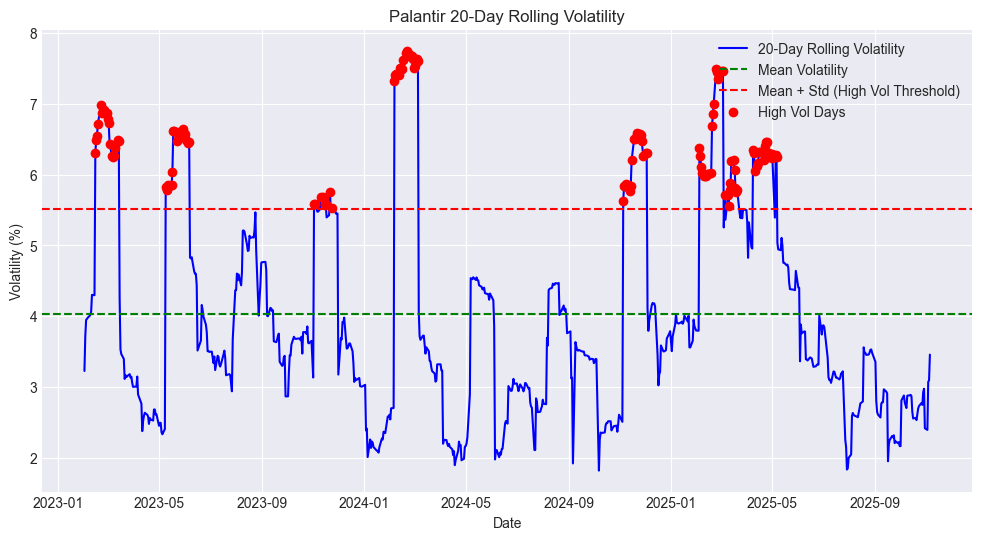

Price,Close,High,Low,Open,Volume,Daily_Return,Rolling_Volatility
Date,,,,,,,
2023-02-14,9.22,9.295,8.230,8.59,216055200,0.211564,6.305717
2023-02-15,10.11,10.230,9.110,9.16,153210400,0.096529,6.485300
2023-02-16,9.71,10.310,9.600,9.65,88638800,-0.039565,6.549054
2023-02-17,9.20,9.710,9.085,9.57,62137800,-0.052523,6.721499
2023-02-21,8.47,9.100,8.400,9.01,65226600,-0.079348,6.986301


In [11]:
# --------------------------------------------------------------
# ⚙️ Analyze and visualize short-term volatility dynamics
# --------------------------------------------------------------
# This cell calculates Palantir’s 20-day rolling volatility, providing a 
# moving estimate of how much daily returns fluctuate over time. By comparing 
# each window’s volatility to its long-term average and standard deviation, 
# we can flag periods of unusually high market turbulence. The resulting 
# chart visualizes volatility clusters and potential stress periods — useful 
# for understanding risk patterns, earnings reactions, or market sentiment shifts.


import pandas as pd
import matplotlib.pyplot as plt

# Compute daily percent change
pltr['Daily_Return'] = pltr['Close'].pct_change()

# Compute 20-day rolling volatility (in %)
pltr['Rolling_Volatility'] = pltr['Daily_Return'].rolling(window=20).std() * 100

# Calculate thresholds for high volatility
mean_vol = pltr['Rolling_Volatility'].mean()
std_vol = pltr['Rolling_Volatility'].std()

# Identify days of high volatility
high_vol_days = pltr[pltr['Rolling_Volatility'] > mean_vol + std_vol].copy()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(pltr.index, pltr['Rolling_Volatility'], label='20-Day Rolling Volatility', color='blue')
plt.axhline(mean_vol, color='green', linestyle='--', label='Mean Volatility')
plt.axhline(mean_vol + std_vol, color='red', linestyle='--', label='Mean + Std (High Vol Threshold)')
plt.scatter(high_vol_days.index, high_vol_days['Rolling_Volatility'], color='red', label='High Vol Days', zorder=5)
plt.title('Palantir 20-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True)
plt.show()

high_vol_days.head()

## Step 6: Report Generation

- To generate a report summarizing the insights, use a prompt like this:
  
  > Use locl model: qwen2.5:7b-instruct-q4_0 to generate a summary that takes in these variables:
  > - ticker: stock ticker (string)
  > - start_date: analysis starting period (string)
  > - end_date: analysis end period (string)
  > - numerical metrics: total_return & volatility (in percentage)
  > - peak_date, peak_price
  > - lowest_date, lowest_price
  > - high_vol_days: pandas DataFrame showing high volatility days
  > - news_snippets: string containing snippet of news for the peak and lowest dates
  >
  

In [12]:
# --------------------------------------------------------------
# 🧠 Generate structured AI-assisted market summary
# --------------------------------------------------------------
# This cell synthesizes quantitative performance metrics and contextual 
# financial news into a structured research brief using a local LLM model.
# It validates that key indicators (return, volatility, peak/low metrics) 
# are available or recomputes them if missing, retrieves relevant news via 
# the Serper API, and builds a detailed analyst-style prompt. 
# The final summary is generated through a local Ollama model 
# (e.g., Llama 3.1 or Qwen 2.5) and printed as a professional report.
# This step bridges the gap between raw financial analysis and 
# natural-language interpretation for decision-ready insights.

from dotenv import load_dotenv
import os, requests, pandas as pd, yfinance as yf
from datetime import datetime
import numpy as np

# --- Load environment & configuration ---
load_dotenv()
OLLAMA_URL = os.getenv("OLLAMA_URL", "http://localhost:11434/api/chat")
OLLAMA_MODEL = os.getenv("OLLAMA_MODEL", "llama3.1:8b-instruct-q8_0") #qwen2.5:7b-instruct-q4_0
SERPER_API_KEY = os.getenv("SERPER_API_KEY")

ticker = "PLTR"
start_date = "2023-01-01"
end_date = "2025-11-07"

# --- Ensure required metrics exist (recompute if needed) ---
missing_vars = [v for v in ["total_return","volatility","peak_price",
                            "lowest_price","peak_date","lowest_date","high_vol_days"]
                if v not in locals()]

if missing_vars:
    print(f"⚙️  Recomputing metrics for {ticker} (missing {', '.join(missing_vars)}) ...")
    pltr = yf.download(ticker, start=start_date, end=end_date)

    # Ensure the index is datetime
    if not isinstance(pltr.index, pd.DatetimeIndex):
        pltr.index = pd.to_datetime(pltr.index, errors="coerce")

    pltr["Daily_Return"] = pltr["Close"].pct_change()

    total_return = (pltr["Close"].iloc[-1] / pltr["Close"].iloc[0] - 1) * 100
    volatility = pltr["Daily_Return"].std() * 100
    peak_price = pltr["Close"].max()
    lowest_price = pltr["Close"].min()

    # Extract corresponding dates (safe datetime formatting)
    peak_date = pltr["Close"].idxmax()
    lowest_date = pltr["Close"].idxmin()
    peak_date = peak_date.strftime("%Y-%m-%d %H:%M:%S") if hasattr(peak_date, "strftime") else str(peak_date)
    lowest_date = lowest_date.strftime("%Y-%m-%d %H:%M:%S") if hasattr(lowest_date, "strftime") else str(lowest_date)

    # Identify high volatility days
    rolling_vol = pltr["Daily_Return"].rolling(20).std() * 100
    threshold = rolling_vol.quantile(0.95)
    high_vol_days = pltr.loc[rolling_vol > threshold, ["Close"]].copy()
    high_vol_days["volatility"] = rolling_vol[rolling_vol > threshold]

# --- Ensure numeric values are scalars ---
def to_scalar(x):
    if isinstance(x, (pd.Series, np.ndarray, list)):
        return float(np.mean(x))
    return float(x)

total_return = to_scalar(total_return)
volatility = to_scalar(volatility)
peak_price = to_scalar(peak_price)
lowest_price = to_scalar(lowest_price)

# --- Fetch news via Serper ---
def get_news_snippets(query, max_results=4):
    if not SERPER_API_KEY:
        return ["⚠️ SERPER_API_KEY not found — please add to .env."]
    headers = {"X-API-KEY": SERPER_API_KEY, "Content-Type": "application/json"}
    payload = {"q": query, "type": "news", "num": max_results}
    try:
        r = requests.post("https://google.serper.dev/search", headers=headers, json=payload, timeout=20)
        r.raise_for_status()
        items = r.json().get("news", [])
        return [
            f"- {n.get('title','')} ({n.get('source','')}, {n.get('date','')}) — {n.get('snippet','')}"
            for n in items
        ] or ["No relevant news found."]
    except Exception as e:
        return [f"⚠️ Serper error: {e}"]

# --- Retrieve contextual news ---
peak_context = get_news_snippets("Palantir Technologies November 2025 earnings")
low_context  = get_news_snippets("Palantir Technologies January 2023 stock decline")
news_snippets = "\n".join(peak_context[:3] + low_context[:3])

# --- Build LLM prompt ---
prompt = f"""
You are a **senior equity market analyst** preparing a brief for an institutional research report. 
Write a concise, structured summary of this stock’s performance using a professional, objective tone.

**Stock Overview**
- **Ticker:** {ticker}
- **Analysis Period:** {start_date} → {end_date}

**Quantitative Highlights**
- **Total Return:** {total_return:.2f}%
- **Volatility:** {volatility:.2f}%
- **Peak:** ${peak_price:.2f} on {peak_date}
- **Low:** ${lowest_price:.2f} on {lowest_date}

**Market Context (recent headlines)**
{news_snippets}

**Analyst Tasks**
1. Describe the stock’s overall **trend** and major **inflection points** between {start_date} and {end_date}.
2. Identify key **drivers of performance** such as AI contracts, government deals, earnings momentum, or macro events.
3. Interpret **volatility and investor sentiment**, linking to notable news or leadership commentary.
4. Provide a **balanced forward outlook** for 2026, noting valuation, growth opportunities, and risk factors.
5. Maintain a factual, analytical, and neutral tone — no hype, no filler.

Conclude with a one-sentence **Key Takeaway** summarizing the risk–reward outlook for investors.
"""


# --- Query local Ollama model ---
try:
    response = requests.post(
        OLLAMA_URL,
        json={"model": OLLAMA_MODEL, "messages": [{"role": "user", "content": prompt}], "stream": False},
        timeout=120,
    )
    response.raise_for_status()
    data = response.json()
    summary = (
        data.get("message", {}).get("content")
        or data.get("response")
        or str(data)
    )

    print("\n--- 📈 Professional Analyst Summary ---\n")
    print(summary.strip())
    print("\n--- 🧩 Structured Insight Complete ---")


except requests.exceptions.RequestException as e:
    print(f"⚠️ Ollama request error: {e}")


C:\Users\ITSMARTSOLUTIONS\AppData\Local\Temp\ipykernel_6676\3083034809.py:36: FutureWarning: YF.download() has changed argument auto_adjust default to True
  pltr = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

⚙️  Recomputing metrics for PLTR (missing total_return, volatility, peak_price, lowest_price, peak_date, lowest_date, high_vol_days) ...



--- 📈 Professional Analyst Summary ---

### Stock Performance Summary: Palantir Technologies Inc. (PLTR)

**Overall Trend and Major Inflection Points**
Between January 1, 2023, and November 7, 2025, PLTR has experienced a dramatic price movement, recording a total return of 2639.44%. The stock reached its peak value of $207.18 on November 3, 2025, following several key inflection points:
- **Initial Surge (Q2-Q3 2023):** Following the release of strong AI contracts and government deals, PLTR saw a significant increase in momentum.
- **Peak and Subsequent Correction (Q4 2023 – Q1 2024):** The stock peaked at $207.18 but quickly corrected due to macroeconomic challenges and market volatility.
- **Recovery Phase (Q2-Q3 2024):** A series of positive earnings reports and contract wins led to a recovery, though the stock was still volatile.
- **Recent Volatility (November 2025):** Recent headlines indicate heightened investor sentiment, with CEO John Karp's public slams on short sellers con

In [13]:
import pypandoc
print(pypandoc.get_pandoc_version())


3.8.2.1


In [14]:
# --------------------------------------------------------------
# 📄 Generate and export an automated analyst report
# --------------------------------------------------------------
# This cell compiles the results of the Palantir analysis into a 
# structured Markdown report and automatically converts it to PDF or DOCX. 
# It combines key metrics, contextual news, and AI-generated insights 
# into a well-formatted summary for presentation or archival purposes. 
# The export process prioritizes PDF output using LaTeX (if available), 
# but falls back to DOCX for compatibility. This step marks the final 
# stage of the reporting workflow, transforming analytical results 
# into a polished deliverable for decision-makers.

from datetime import datetime
from pathlib import Path
import pypandoc
import shutil
import pandas as pd

# --- Values from your analysis step ---
ticker = "PLTR"
start_date = "2023-01-01"
end_date = "2025-11-07"

# Computed metrics (from previous block)
# total_return, volatility, peak_price, lowest_price, peak_date, lowest_date, news_snippets, summary

# --- Helper for readable dates ---
def fmt_date(d):
    try:
        return str(pd.to_datetime(d).date())
    except Exception:
        return str(d)

# --------------------------------------------------------------
# 🧾 Build Markdown report
# --------------------------------------------------------------
md_report = f"""
# 📈 {ticker} — Stock Performance Summary  
**Period:** {start_date} → {end_date}  
**Generated:** {datetime.now():%Y-%m-%d %H:%M}  
**Data source:** Yahoo Finance + Serper + Ollama  

---

## 🧮 Key Metrics
- **Total Return:** {total_return:.2f} %
- **Volatility:** {volatility:.2f} %
- **Peak:** ${peak_price:.2f} on {fmt_date(peak_date)}
- **Low:** ${lowest_price:.2f} on {fmt_date(lowest_date)}

---

## 📰 Contextual News
{news_snippets}

---

## 🧠 Analyst Summary
{summary.strip()}

---

**Key Takeaway:**  
*{summary.split('Key Takeaway:')[-1].strip() if 'Key Takeaway:' in summary else 'See above for details.'}*
"""

# --------------------------------------------------------------
# 💾 Export Markdown → PDF (fallback to DOCX if no LaTeX)
# --------------------------------------------------------------
output_dir = Path("reports")
output_dir.mkdir(exist_ok=True)
md_path = output_dir / f"{ticker.lower()}_report.md"
pdf_path = output_dir / f"{ticker.lower()}_report.pdf"
docx_path = output_dir / f"{ticker.lower()}_report.docx"

md_path.write_text(md_report, encoding="utf-8")

# Detect PDF engine
has_tex = shutil.which("xelatex") or shutil.which("pdflatex")

try:
    if has_tex:
        pypandoc.convert_text(
            md_report,
            "pdf",
            format="md",
            outputfile=str(pdf_path),
            extra_args=["--standalone", "--pdf-engine=xelatex"],
        )
        print(f"✅ PDF exported → {pdf_path}")
    else:
        pypandoc.convert_text(
            md_report,
            "docx",
            format="md",
            outputfile=str(docx_path),
            extra_args=["--standalone"],
        )
        print(f"⚠️ No LaTeX engine found — exported DOCX instead → {docx_path}")
except Exception as e:
    print(f"❌ Export failed: {e}")
    print(f"Markdown saved to {md_path}")


⚠️ No LaTeX engine found — exported DOCX instead → reports\pltr_report.docx
